In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data_train = pd.read_csv('C:/Users/Dell/Desktop/Assignments/SVM/SalaryData_Train.csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_test = pd.read_csv('C:/Users/Dell/Desktop/Assignments/SVM/SalaryData_Test.csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
data_test.shape

(15060, 14)

In [7]:
data_train.shape

(30161, 14)

In [9]:
data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
label_encoder = LabelEncoder()
standard_scaler = StandardScaler()

In [13]:
x_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]

In [14]:
x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

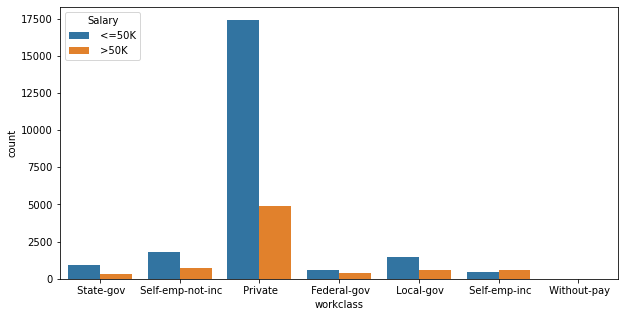

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data_train.workclass,hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

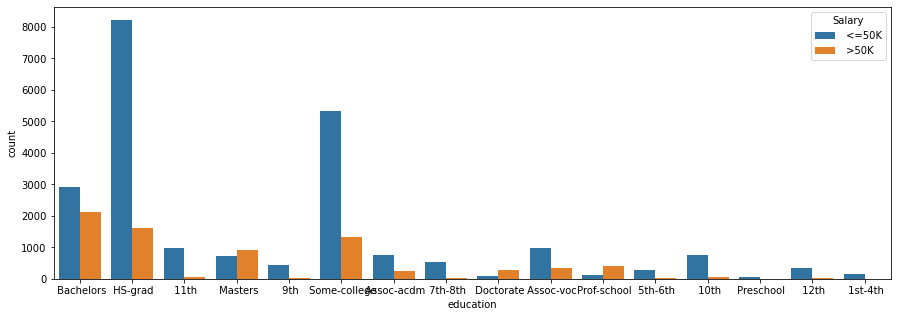

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data_train.education, hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

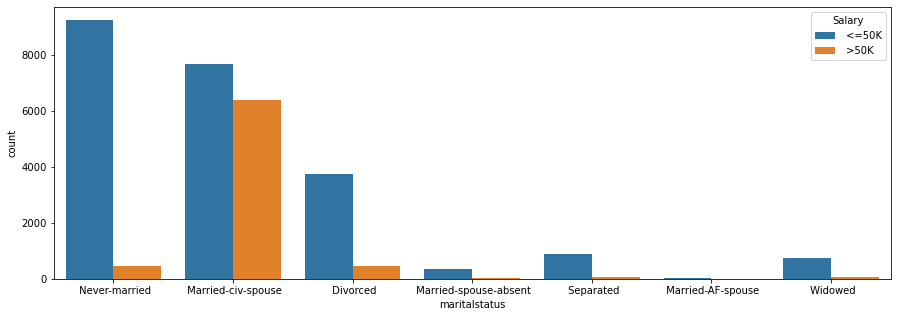

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data_train.maritalstatus, hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

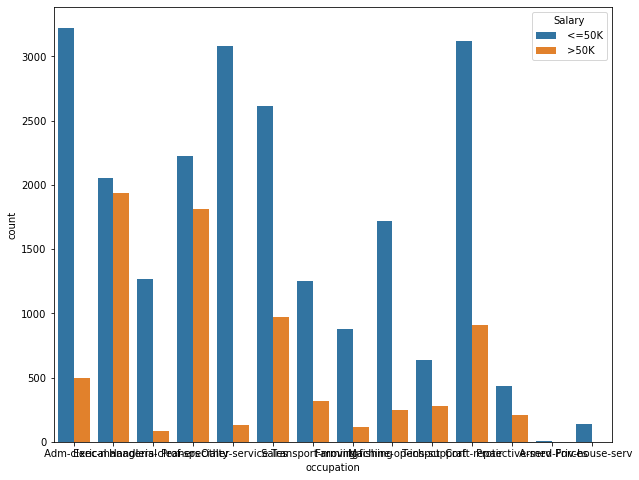

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data_train.occupation, hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

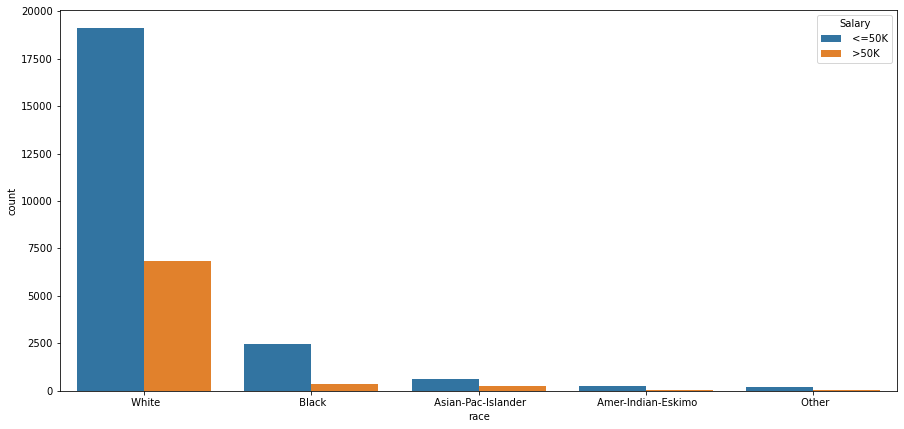

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(data_train.race, hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

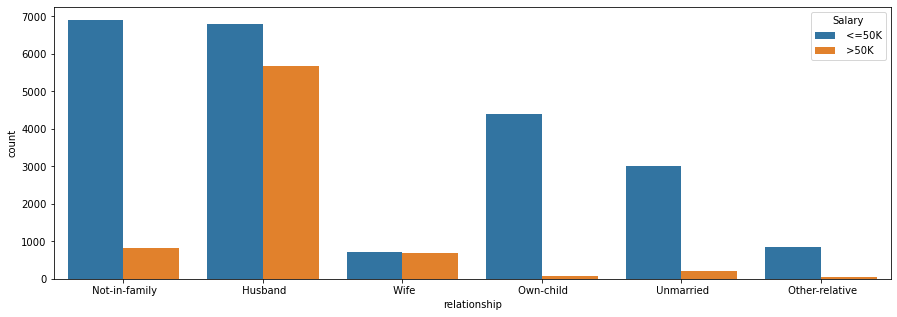

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(data_train.relationship, hue=data_train.Salary)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

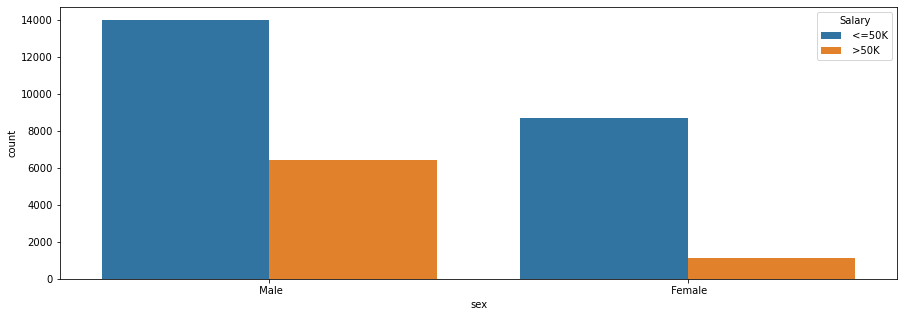

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data_train.sex, hue=data_train.Salary)

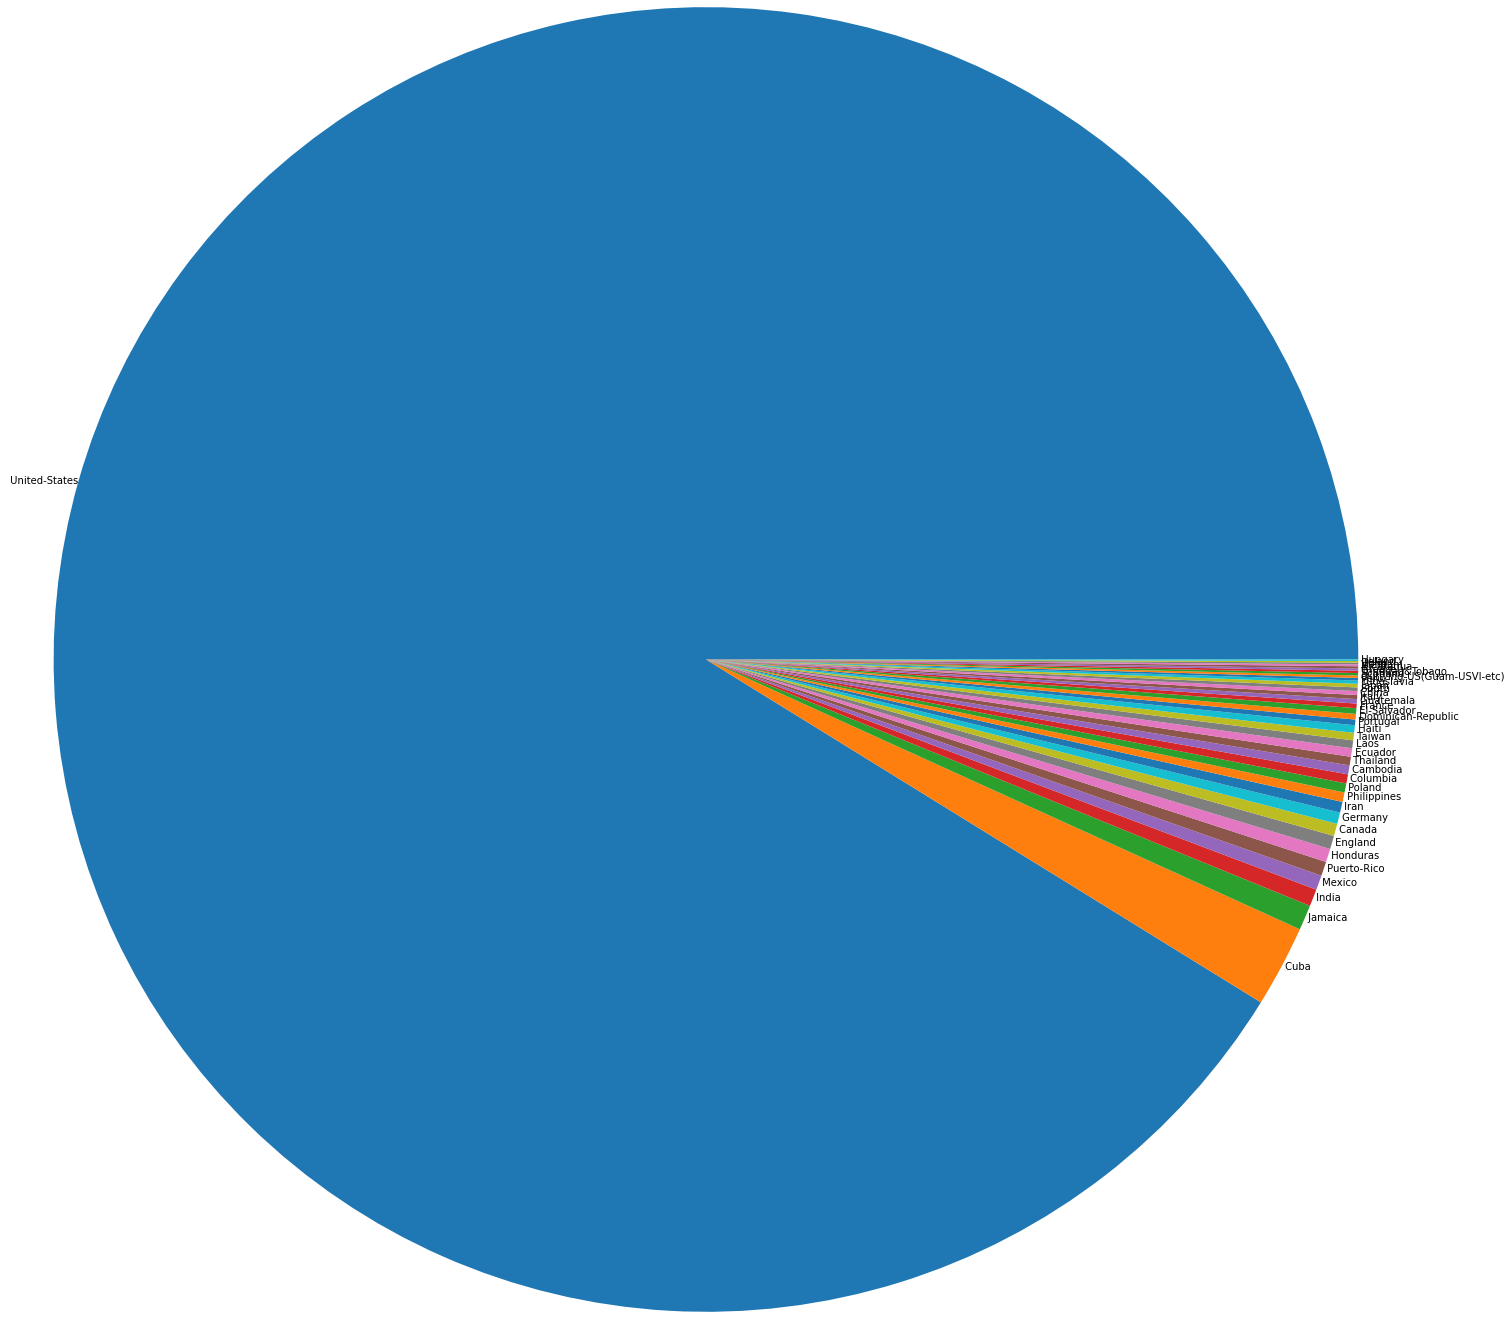

In [35]:
plt.figure(figsize=(20,6))
plt.pie(data_train.native.value_counts(),labels=data_train.native.unique(), labeldistance=1, radius=5);

In [40]:
cat = [col for col in x_train.columns if data_train[col].dtypes=='object']
num = [col for col in x_train.columns if data_train[col].dtypes=='int64']

In [41]:
cat

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [42]:
for i in cat:
    
    x_train.loc[:,i]=label_encoder.fit_transform(x_train.loc[:,i])
    x_test.loc[:,i]=label_encoder.fit_transform(x_test.loc[:,i])

In [43]:
y_train,y_test = label_encoder.fit_transform(y_train) ,label_encoder.fit_transform(y_test)

In [45]:
x_train.loc[:,num]=standard_scaler.fit_transform(x_train.loc[:,num])
x_test.loc[:,num]=standard_scaler.fit_transform(x_test.loc[:,num])

In [46]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [ 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  16.2s
[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  17.0s
[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  18.1s
[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  18.7s
[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  18.3s
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=  21.4s
[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=  20.1s
[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=  18.0s
[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=  18.6s
[CV 5/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=  18.7s
[CV 1/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=  18.1s
[CV 2/5] END ................C=0.1, gamma=0.0001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
#Best parameter and estimator
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [50]:
#Accuracy
clf = SVC(C= 10, gamma = 0.1)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy =  83.45949535192563


array([[10375,   985],
       [ 1506,  2194]], dtype=int64)